In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas.io.data import DataReader

In [3]:
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
# Grab some data from some tech stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [6]:
# Setup a start and end time
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [7]:
# make a for loop to grab the data and set as dataframe
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-02-26,204.000000,211.089996,202.220001,207.190002,6472900,207.190002
2015-02-27,206.899994,208.550003,202.800003,203.339996,3882100,203.339996
2015-03-02,202.699997,203.339996,195.830002,197.330002,7922100,197.330002
2015-03-03,196.809998,200.240005,195.320007,199.559998,4432300,199.559998
2015-03-04,199.250000,202.520004,197.210007,202.440002,4222000,202.440002


In [9]:
TSLA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000
mean,227.121071,230.710555,223.082896,227.028771,4372130.15873,227.028771
std,28.342127,28.100390,28.841444,28.700712,2233947.48756,28.700712
min,142.320007,154.970001,141.050003,143.669998,708000.00000,143.669998
25%,208.074997,210.862495,203.880001,207.392506,2880475.00000,207.392506
50%,230.455002,233.315002,225.844993,230.404999,3844650.00000,230.404999
75%,249.579994,252.020001,246.002499,248.857498,5121100.00000,248.857498
max,280.200012,286.649994,276.299988,282.260010,14863300.00000,282.260010


In [10]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-02-26 to 2016-02-25
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


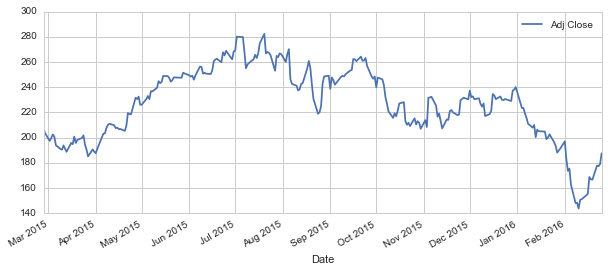

In [11]:
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

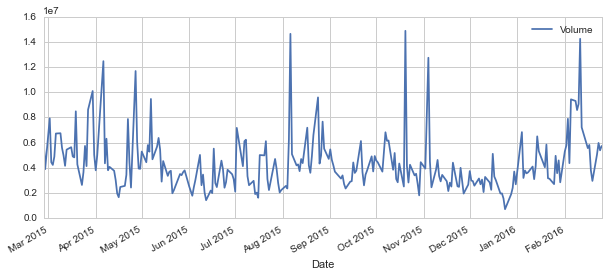

In [12]:
#Lets plot the volume of each stock traded over a year
TSLA['Volume'].plot(legend=True,figsize=(10,4))

In [13]:
# Calculate the moving average for the stock
mas_day = [10,20,50]

for mas in mas_day:
    column_name = "MA for %s days" %(str(mas))
    
    TSLA[column_name] = pd.rolling_mean(TSLA['Adj Close'],mas)

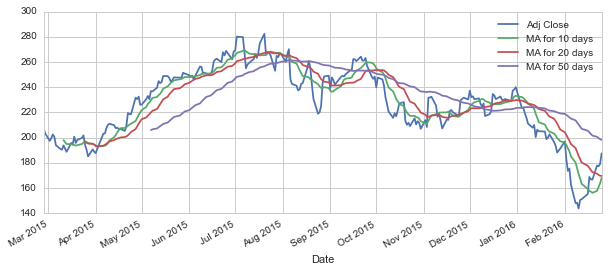

In [14]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# Daily returns and risk of the stock


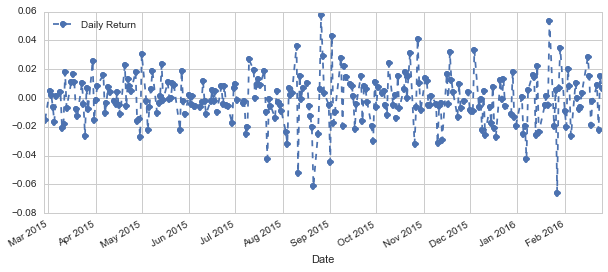

In [15]:
#Use pandas to retrive the daily returns for the apple stock
TSLA['Daily Return'] = AAPL['Adj Close'].pct_change()

TSLA['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

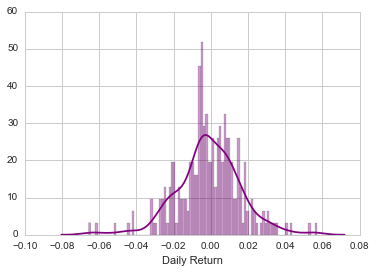

In [16]:
#Lets look at the average daily return
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

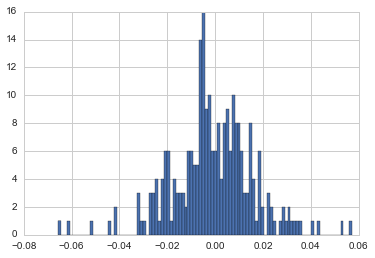

In [17]:
TSLA['Daily Return'].hist(bins=100)

In [18]:
#Lets build a new dataframe for the adjusted closed columns
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
closing_df

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2015-02-26,128.046365,384.799988,555.482516,42.889618,207.190002
2015-02-27,126.122045,380.160004,558.402511,42.685193,203.339996
2015-03-02,126.740569,385.660004,571.342601,42.714399,197.330002
2015-03-03,127.005659,384.609985,573.642610,42.130335,199.559998
2015-03-04,126.200576,382.720001,573.372583,41.916181,202.440002
2015-03-05,124.109352,387.829987,575.332609,41.964852,200.630005
2015-03-06,124.295889,380.089996,567.687558,41.234775,193.880005
2015-03-09,124.826061,378.559998,568.852557,41.711757,190.880005
2015-03-10,122.243930,369.510010,555.012538,40.913539,190.320007


In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2015-02-26,NaN,NaN,NaN,NaN,NaN
2015-02-27,-0.015028,-0.012058,0.005257,-0.004766,-0.018582
2015-03-02,0.004904,0.014468,0.023173,0.000684,-0.029556
2015-03-03,0.002092,-0.002723,0.004026,-0.013674,0.011301
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083,0.014432


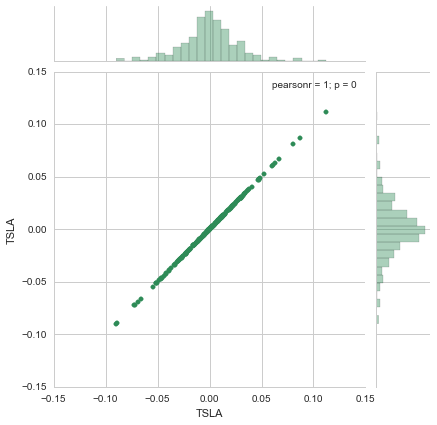

In [22]:
#Compare the daily return stocks to see how theyre correlated
sns.jointplot('TSLA','TSLA',tech_rets,kind='scatter',color='seagreen')

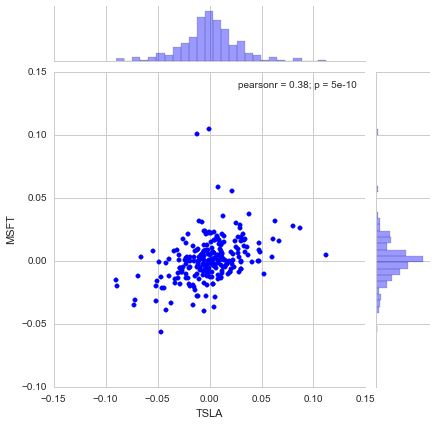

In [23]:
#pearson R value is 1 because it's comparing with itself, two stocks are perfectly correlated with each other
#lEts compare two different stocks
sns.jointplot('TSLA','MSFT',tech_rets,kind='scatter',color='blue')

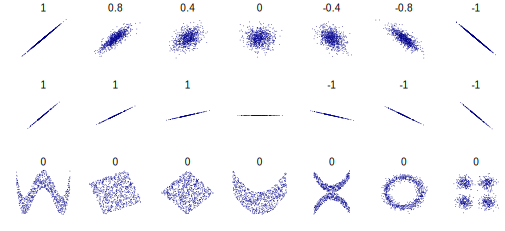

In [24]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

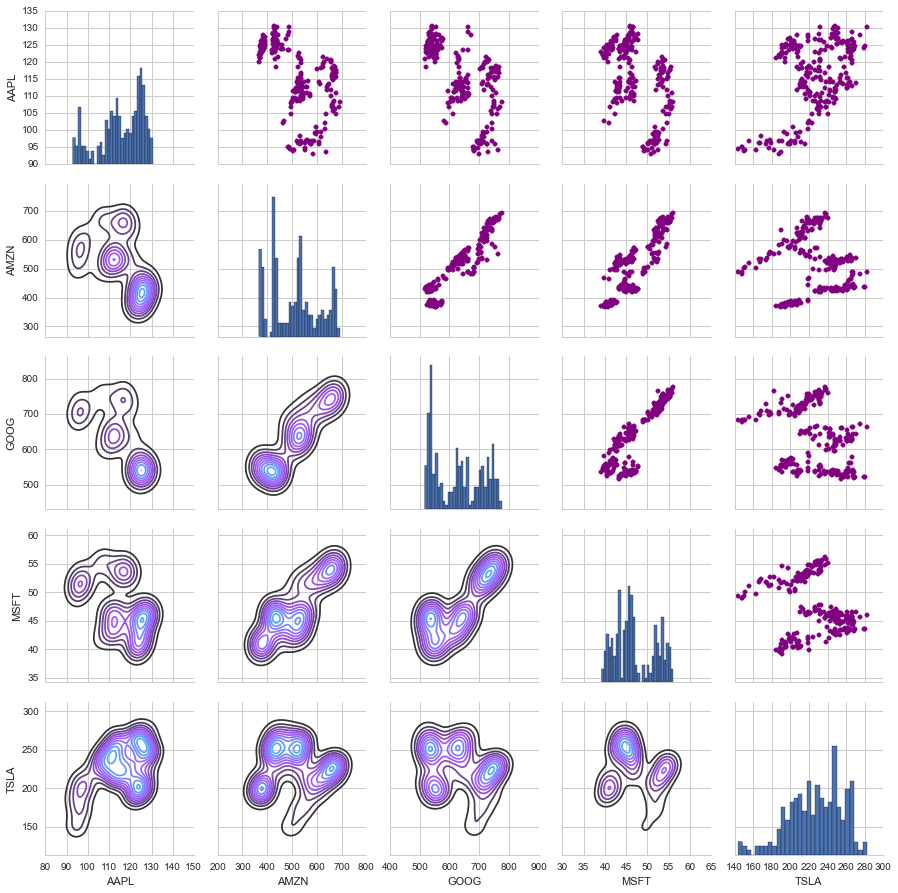

In [25]:
#Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df.dropna())

#Using map_upper we can specify what the upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

#We can also define the lower triangle in the figure, including the plot type(kde) or the color map(bluepurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Finally we'll definte he diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)



C:\Users\Data.Steve-PC\Python\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Data.Steve-PC\Python\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


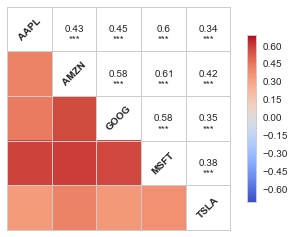

In [26]:
# do a numerical core plot
sns.corrplot(tech_rets.dropna(),annot=True)

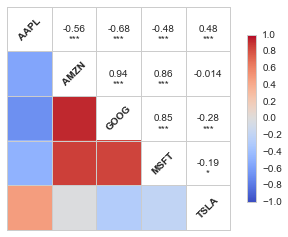

In [27]:
sns.corrplot(closing_df,annot=True)

In [28]:
#Just finished using pair plots, now going to see risk. compare the expected return with the standard deviation 
rets = tech_rets.dropna()

In [29]:
area = np.pi*20

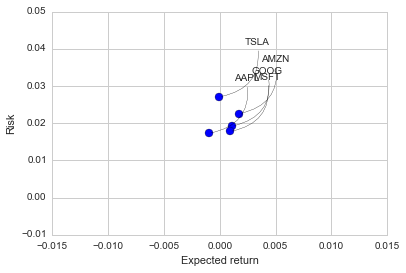

In [30]:
plt.scatter(rets.mean(),rets.std(),s = area,)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#zip allows to call multiple things at once
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.5'))

# Value at risk

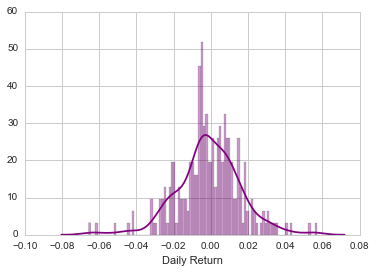

In [31]:
# The amount of money we expect to lose for a given confidence interval

# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [32]:
rets.head()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2015-02-27,-0.015028,-0.012058,0.005257,-0.004766,-0.018582
2015-03-02,0.004904,0.014468,0.023173,0.000684,-0.029556
2015-03-03,0.002092,-0.002723,0.004026,-0.013674,0.011301
2015-03-04,-0.006339,-0.004914,-0.000471,-0.005083,0.014432
2015-03-05,-0.016571,0.013352,0.003418,0.001161,-0.008941


In [33]:
rets['TSLA'].quantile(0.05)

-0.046363394218626619

In [34]:
# With 95% confidence, your worst daily loss will not exceed -2.5% for AAPL (9/16/2015)

# Value at risk using the monte carlo method

In [35]:
days = 365

dt = 1/days

#Average daily returns
mu = rets.mean()['TSLA']

#Standard deviation of daily returns
sigma = rets.std()['TSLA']

In [36]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [37]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2015-02-26,204.000000,211.089996,202.220001,207.190002,6472900,207.190002,NaN,NaN,NaN,NaN
2015-02-27,206.899994,208.550003,202.800003,203.339996,3882100,203.339996,NaN,NaN,NaN,-0.015028
2015-03-02,202.699997,203.339996,195.830002,197.330002,7922100,197.330002,NaN,NaN,NaN,0.004904
2015-03-03,196.809998,200.240005,195.320007,199.559998,4432300,199.559998,NaN,NaN,NaN,0.002092
2015-03-04,199.250000,202.520004,197.210007,202.440002,4222000,202.440002,NaN,NaN,NaN,-0.006339


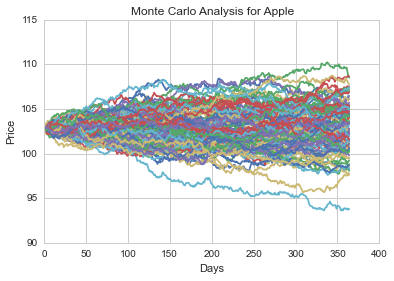

In [38]:
start_price = 102.80

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [39]:
#Simulated a year of stock 


In [40]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

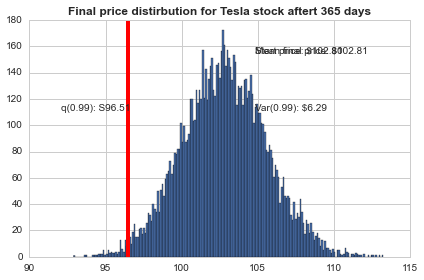

In [41]:
#Now that we've made an array of our simulations, make a histogram of the array
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot
# Starting price
plt.figtext(0.6,0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.8, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "Var(0.99): $%.2f" %(start_price - q,))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): S%.2f" % q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distirbution for Tesla stock aftert %s days" % days, weight ='bold')

plt.tight_layout()